In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import emcee
from astropy.io import fits
import dill as pickle
from emcee import EnsembleSampler
import numpy as np
import os
import sys
import math

pwd = os.getcwd()
little_things_root_dir = os.path.dirname(pwd)
sys.path.append(little_things_root_dir)

from little_things_lib.galaxy import Galaxy
from little_things_lib.nfw_mcmc_fitter import (
    EmceeParameters,
    get_mcmc_start_position, 
    generate_nwalkers_start_points, 
    lnprob)
from little_things_lib.plotting import plot_posterior_distributions, plot_walker_paths

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
infile = open('/Users/stephencoffey/Downloads/little-things/notebooks/DDO46 pkl/sampler.pkl','rb')
sampler = pickle.load(infile)

Vmax: 81.62500559853659


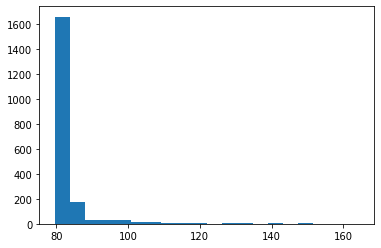

Rmax: 9.573481317519887


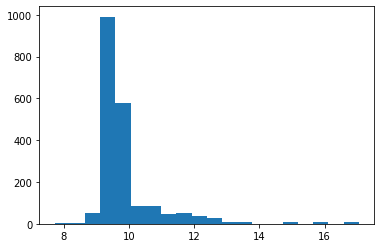

In [14]:
G=4.301e-6 #units of kpc km^2 M_solar^-1 s^-2

# This will pick out values for rhos and rs
rhos_chain = sampler.chain[:, :, 0].flatten()
rs_chain = sampler.chain[:, :, 1].flatten()

# This will find V for every element in Ps and Rs 
Vmax = np.sqrt(0.216 * 4 * np.pi* G * 10**(rhos_chain) * np.square(10**(rs_chain)) )
print ("Vmax:", np.median(Vmax))

# This plots a histogram showing Vmax compared to other velocities found 
plt.hist(Vmax, bins = 20)
plt.show()
plt.hist(Rmax, bins = 20)
#This finds the Rmax value*
Rmax = 2.16 * (10**rs_chain)
print("Rmax:", np.median(Rmax))

In [4]:
V = np.array(range(100))
R = 26*(V/100)**1.4

R_upper = 10**0.2*R
R_lower = 10**-0.2*R

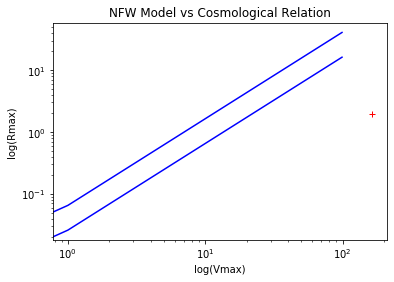

In [5]:
plt.title('NFW Model vs Cosmological Relation')
plt.xlabel('log(Vmax)')
plt.ylabel('log(Rmax)')

plt.loglog(10, 10, V, R_upper, color = 'b')
plt.loglog(10, 10, V, R_lower, color = 'b')

#DDO46
plt.loglog(10, 10, 164.40869875010677,  1.9382644939393299, '+', color = 'r')

#CVnIdwA
#plt.loglog(10, 10, 0.0050685094573839195, 1.3080195223626327, '+', color = 'g')

plt.show()

In [6]:
infile.close()